In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
class TestCell:
    def __init__(self, dt, tmax, t0, t1, amp, **params):
        # tau, r, e, vahp, vth, vup, t_refrac
        # self.tau = params['key']
        for key in params.keys():
            exec("self.%s = params['%s']"%(key, key))
        self.dt = dt
        self.tmax = tmax
        self.t0 = t0
        self.t1 = t1
        self.amp = amp
        self.t = np.arange(0, tmax+dt/2, dt)
        self.v = self.v0
        self.vs = [self.v]
        self.is_fire = False
        self.t_fire = -100

    def run(self):
#         for i in range(len(self.t)-1):
        for i, t in enumerate(self.t[1:]):
            if (self.v > self.vup):
                self.v = self.vahp
                self.is_fire = True
                self.t_fire = t
            elif self.is_fire:
                self.v += self.solveLIF(self.v, 0)
                if (t - self.t_fire) > self.tahp:
                    self.is_fire = False
            else:                
                if (self.t[i+1] >= self.t0) and (self.t[i+1] <= self.t1):
                    I = self.amp
                else:
                    I = 0
                self.v += self.solveLIF(self.v, I)
                
            self.vs.append(self.v)

    def solveLIF(self, v, I):
        dv1 = self.fLIF(v, I) * self.dt
        dv2 = self.fLIF(v+dv1/2, I) * self.dt
        dv3 = self.fLIF(v+dv2/2, I) * self.dt
        dv4 = self.fLIF(v+dv3, I) * self.dt
        return (dv1+2*dv2+2*dv3+dv4)*self.dt

    def fLIF(self, v, I):
        return ((self.e - self.v) + self.del_t*np.exp((v-self.vth)/self.del_t)  + self.r*I)/self.tau
#         return ((self.e - self.v)*self.g + self.del_t*np.exp((v-self.vth)/self.del_t) + I) / self.C
#         return ((self.e - self.v)  + self.r*I)/self.tau

In [98]:
params = {'tau':20, 'r':100, 'e':-65, 'vth':-55, 'vup':-40, 'v0':-65, 'vahp':-80, 'del_t':2, 'tahp':0}
# params = {'C':165, 'e':-85, 'vth':-52.4, 'vup':-45.9, 'v0':-65, 'vahp':-120, 'del_t':21, 'g':7.04, 'tahp':0}
cell = TestCell(0.01, 1000, 100, 200, 1, **params)

In [99]:
cell.run()

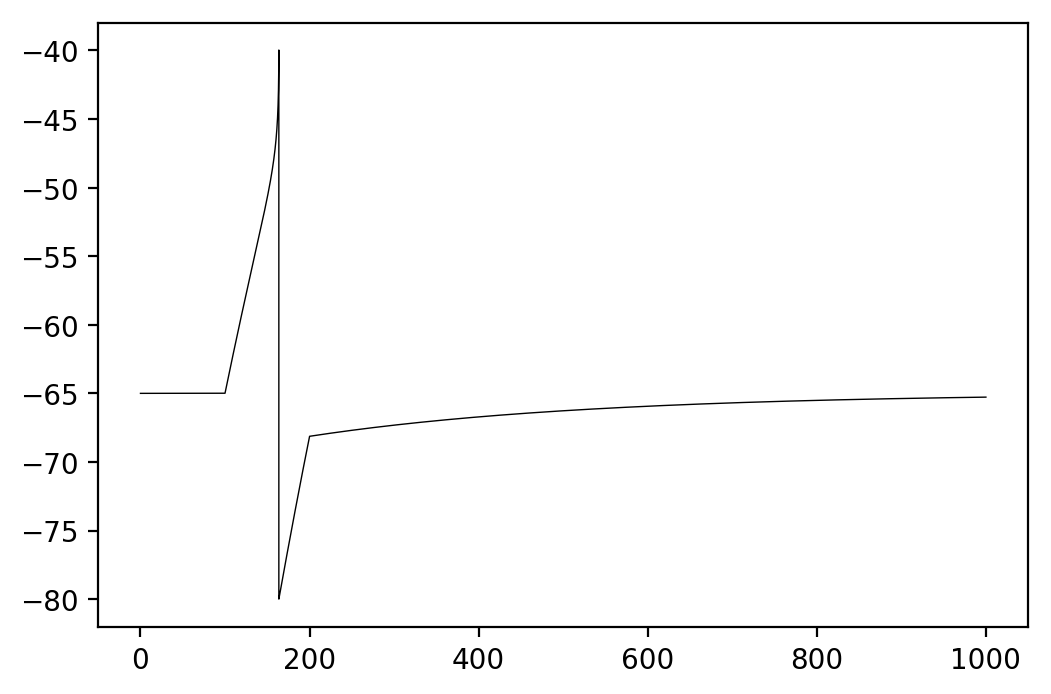

In [100]:
plt.figure(dpi=200)
plt.plot(cell.t, cell.vs, 'k', lw=0.5)
plt.show()

In [22]:
a.x

10